In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [12]:
peptides_df= pd.read_csv("train_peptides.csv")
peptides_df.head()

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.3
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.0
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.0
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.9
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.7


In [13]:
proteins_df= pd.read_csv("train_proteins.csv")
proteins_df.head()

,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,O00391,11254.3
1,55_0,0,55,O00533,732430.0
2,55_0,0,55,O00584,39585.8
3,55_0,0,55,O14498,41526.9
4,55_0,0,55,O14773,31238.0


In [14]:
clinical_df= pd.read_csv('train_clinical_data.csv')
clinical_df.head()

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On


In [15]:
print(peptides_df.shape)
print (proteins_df.shape)
print(clinical_df.shape)

(981834, 6)
(232741, 5)
(2615, 8)


EDA

In [30]:
print("There are {:,d} unique patient_id values".format(peptides_df["patient_id"].nunique()))
print("There are {:,d} unique UniProt values".format(peptides_df["UniProt"].nunique()))
print("There are {:,d} unique Peptide values".format(peptides_df["Peptide"].nunique()))

There are 248 unique patient_id values
There are 227 unique UniProt values
There are 968 unique Peptide values


In [16]:
display(clinical_df.describe(include="all"))

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
count,2615,2615.000000,2615.000000,2614.000000,2613.00000,2590.000000,1577.000000,1288
unique,2615,NaN,NaN,NaN,NaN,NaN,NaN,2
top,55_0,NaN,NaN,NaN,NaN,NaN,NaN,On
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,775
mean,NaN,32651.743786,31.190822,7.110559,6.74359,19.421236,1.861763,NaN
std,NaN,18535.758700,25.199053,5.525955,6.32323,15.000289,3.022112,NaN
min,NaN,55.000000,0.000000,0.000000,0.00000,0.000000,0.000000,NaN
25%,NaN,16574.000000,10.500000,3.000000,1.00000,6.000000,0.000000,NaN
50%,NaN,29417.000000,24.000000,6.000000,5.00000,19.000000,0.000000,NaN
75%,NaN,50611.000000,48.000000,10.000000,10.00000,29.000000,3.000000,NaN


In [17]:
display(peptides_df.describe(include="all"))

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
count,981834,981834.000000,981834.000000,981834,981834,9.818340e+05
unique,1113,NaN,NaN,227,968,NaN
top,47171_6,NaN,NaN,P02787,TLLSNLEEAK,NaN
freq,947,NaN,NaN,51916,1113,NaN
mean,NaN,26.105061,32603.465361,NaN,NaN,6.428902e+05
std,NaN,22.913897,18605.934422,NaN,NaN,3.377989e+06
min,NaN,0.000000,55.000000,NaN,NaN,1.099850e+01
25%,NaN,6.000000,16566.000000,NaN,NaN,2.817425e+04
50%,NaN,24.000000,29313.000000,NaN,NaN,7.430830e+04
75%,NaN,48.000000,49995.000000,NaN,NaN,2.213388e+05


In [18]:
display(proteins_df.describe(include="all"))

,visit_id,visit_month,patient_id,UniProt,NPX
count,232741,232741.000000,232741.000000,232741,2.327410e+05
unique,1113,NaN,NaN,227,NaN
top,55_36,NaN,NaN,P01024,NaN
freq,224,NaN,NaN,1113,NaN
mean,NaN,26.099205,32593.881873,NaN,2.712077e+06
std,NaN,22.874719,18608.479506,NaN,2.224155e+07
min,NaN,0.000000,55.000000,NaN,8.460820e+01
25%,NaN,6.000000,16566.000000,NaN,2.946440e+04
50%,NaN,24.000000,29313.000000,NaN,1.135560e+05
75%,NaN,48.000000,49995.000000,NaN,5.638940e+05


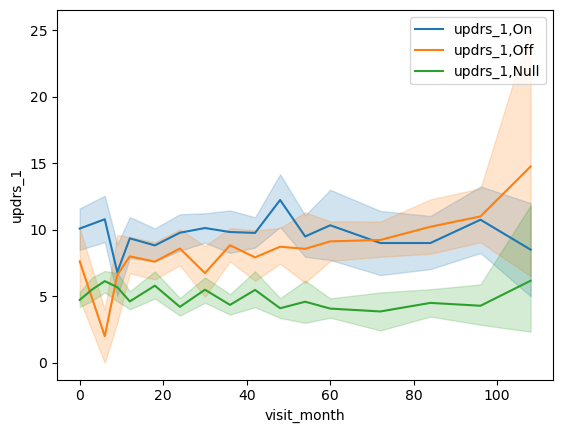

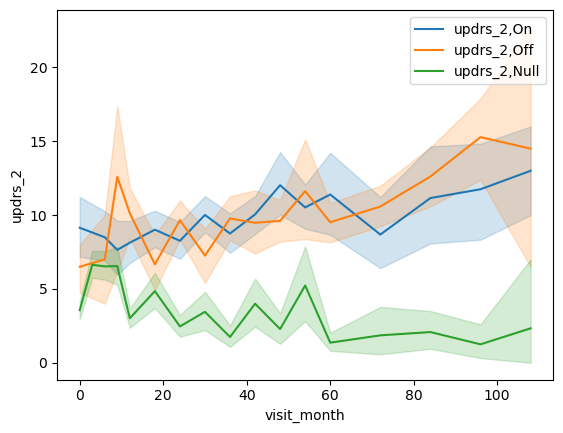

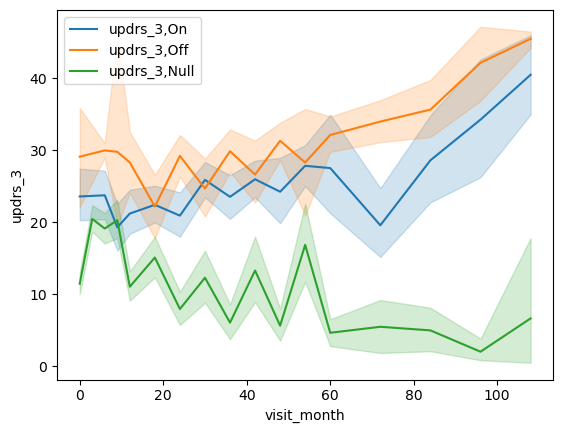

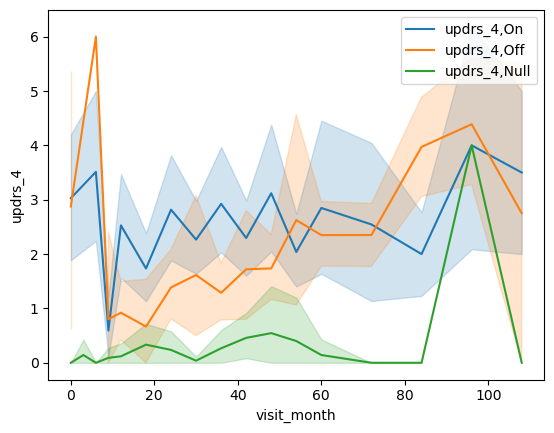

In [19]:
for i in range(1,5):
    flg = clinical_df["upd23b_clinical_state_on_medication"]=="On"
    sns.lineplot(data=clinical_df[flg],x="visit_month",y=f"updrs_{i}",label=f"updrs_{i},On")
    flg = clinical_df["upd23b_clinical_state_on_medication"]=="Off"
    sns.lineplot(data=clinical_df[flg],x="visit_month",y=f"updrs_{i}",label=f"updrs_{i},Off")
    flg = clinical_df["upd23b_clinical_state_on_medication"].isnull()
    sns.lineplot(data=clinical_df[flg],x="visit_month",y=f"updrs_{i}",label=f"updrs_{i},Null")
    plt.legend()
    plt.show()


,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4
count,775.000000,775.000000,775.000000,775.000000,767.000000,760.000000
mean,33091.811613,34.254194,9.734194,9.563871,24.368970,2.450000
std,18440.507348,21.845266,5.990868,6.322368,13.122469,3.513216
min,55.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,16672.000000,18.000000,5.000000,5.000000,15.000000,0.000000
50%,30951.000000,30.000000,9.000000,8.000000,22.000000,0.000000
75%,49995.000000,48.000000,13.000000,13.000000,31.000000,4.000000
max,65043.000000,108.000000,31.000000,40.000000,86.000000,20.000000


,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4
count,513.000000,513.000000,513.000000,513.000000,513.000000,506.000000
mean,34784.744639,46.555556,8.758285,10.037037,30.871345,1.986166
std,18728.992051,23.862671,5.473307,5.894962,12.229216,2.690248
min,942.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,18183.000000,30.000000,5.000000,6.000000,22.000000,0.000000
50%,35465.000000,48.000000,8.000000,9.000000,30.000000,0.000000
75%,52266.000000,60.000000,12.000000,14.000000,38.000000,4.000000
max,65043.000000,108.000000,31.000000,28.000000,78.000000,13.000000


,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4
count,1327.000000,1327.000000,1326.000000,1325.000000,1310.000000,311.000000
mean,31570.144687,23.461944,4.939668,3.818868,12.040458,0.221865
std,18447.870213,24.428765,4.229026,4.965328,12.865730,0.922289
min,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16238.000000,6.000000,2.000000,0.000000,1.000000,0.000000
50%,27971.000000,12.000000,4.000000,2.000000,7.000000,0.000000
75%,48928.000000,36.000000,7.000000,6.000000,21.000000,0.000000
max,65043.000000,108.000000,33.000000,28.000000,68.000000,7.000000


<AxesSubplot:xlabel='updrs', ylabel='updrs_val'>

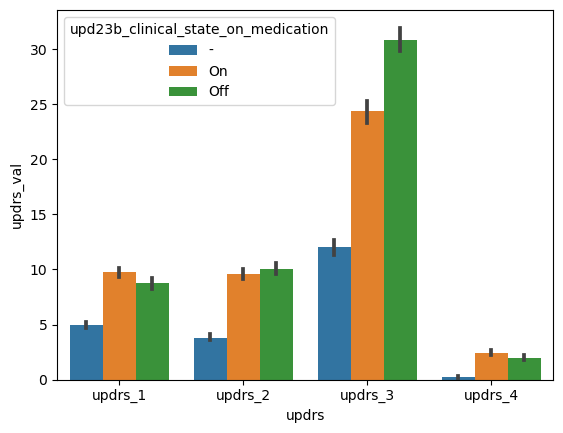

In [21]:
display(clinical_df[clinical_df["upd23b_clinical_state_on_medication"]=="On"].describe())
display(clinical_df[clinical_df["upd23b_clinical_state_on_medication"]=="Off"].describe())
display(clinical_df[clinical_df["upd23b_clinical_state_on_medication"].isnull()].describe())

melted = pd.melt(clinical_df,id_vars=["visit_id","upd23b_clinical_state_on_medication"],value_vars=["updrs_1","updrs_2","updrs_3","updrs_4"],var_name="updrs", value_name="updrs_val")
melted["upd23b_clinical_state_on_medication"] = melted["upd23b_clinical_state_on_medication"].fillna("-")
sns.barplot(data=melted, x="updrs", hue="upd23b_clinical_state_on_medication", y="updrs_val")

UniProt  Peptide                               
O00391   NEQEQPLGQWHLS                              764
O00533   VIAVNEVGR                                 1097
         SMEQNGPGLEYR                              1094
         VNGSPVDNHPFAGDVVFPR                       1069
         KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK    1066
                                                   ... 
Q9UKV8   SGNIPAGTTVDTK                              907
Q9UNU6   KNM(UniMod_35)FEFLK                        761
Q9Y646   LALLVDTVGPR                               1052
Q9Y6R7   GATTSPGVYELSSR                            1021
         AGC(UniMod_4)VAESTAVC(UniMod_4)R           659
Name: Peptide, Length: 968, dtype: int64

UniProt
O00391     1
P13521     1
P13671     1
P14174     1
P16152     1
          ..
P02649    22
P02751    27
P01024    34
P02768    38
P02787    49
Length: 227, dtype: int64

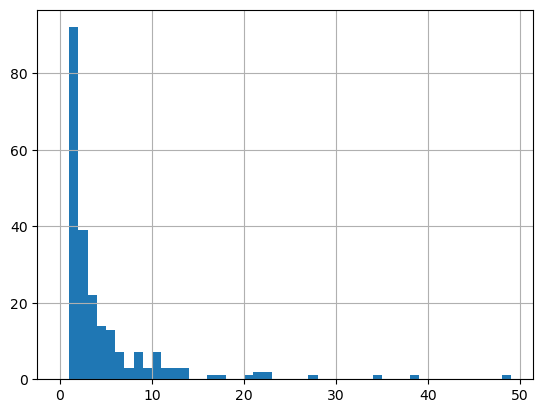

In [22]:
display(peptides_df.groupby("UniProt")["Peptide"].value_counts())
display(peptides_df.drop_duplicates(["UniProt", "Peptide"]).groupby("UniProt").size().sort_values())
peptides_df.drop_duplicates(["UniProt", "Peptide"]).groupby("UniProt").size().hist(bins=range(50))
plt.show()

In [23]:
display(peptides_df.drop_duplicates(["Peptide", "UniProt"]).groupby("Peptide").size().sort_values())
plt.show()

Peptide
AADDTWEPFASGK                                                        1
QC(UniMod_4)VPTEPC(UniMod_4)EDAEDDC(UniMod_4)GNDFQC(UniMod_4)STGR    1
QDGSVDFGR                                                            1
QELSEAEQATR                                                          1
QEPERNEC(UniMod_4)FLQHKDDNPNLPR                                      1
                                                                    ..
HGSPVDIC(UniMod_4)TAKPR                                              1
HGTC(UniMod_4)AAQVDALNSQKK                                           1
HKVYAC(UniMod_4)EVTHQGLSSPVTK                                        1
GNQWVGYDDQESVK                                                       1
YYWGGQYTWDMAK                                                        1
Length: 968, dtype: int64

In [25]:
a = peptides_df.groupby(["visit_id","UniProt"])["PeptideAbundance"].sum().reset_index().merge(proteins_df,on=["visit_id","UniProt"])
a["diff"] = (a["PeptideAbundance"]-a["NPX"])
a["diff_ratio"] = a["diff"]/a["NPX"]
a["diff_ratio"].describe()

count    2.327410e+05
mean     1.457404e-09
std      1.195772e-06
min     -7.652931e-06
25%     -1.277551e-16
50%      0.000000e+00
75%      1.208567e-16
max      7.768943e-06
Name: diff_ratio, dtype: float64

In [26]:
pivot = pd.pivot(peptides_df,index=["visit_id","visit_month","patient_id","UniProt"],columns="Peptide",values="PeptideAbundance")
df = pivot.sum(axis=1).rename("NPX").reset_index()
dfg = df.groupby("visit_id")
dfg["NPX"].sum().rename("NPX_sum").to_frame().join(
    dfg["NPX"].mean().rename("NPX_mean")
).join(clinical_df.set_index("visit_id"))

,NPX_sum,NPX_mean,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
visit_id,,,,,,,,,
10053_0,4.713352e+08,2.856577e+06,10053.0,0.0,3.0,0.0,13.0,0.0,NaN
10053_12,4.666371e+08,2.728872e+06,10053.0,12.0,4.0,2.0,8.0,0.0,NaN
10053_18,5.220732e+08,2.509967e+06,10053.0,18.0,2.0,2.0,0.0,0.0,NaN
10138_12,6.515605e+08,3.002583e+06,10138.0,12.0,3.0,6.0,31.0,0.0,On
10138_24,6.720870e+08,3.068890e+06,10138.0,24.0,4.0,7.0,19.0,10.0,On
...,...,...,...,...,...,...,...,...,...
8699_24,6.618368e+08,3.064059e+06,8699.0,24.0,11.0,10.0,13.0,2.0,On
942_12,5.540194e+08,2.613299e+06,942.0,12.0,5.0,2.0,25.0,0.0,NaN
942_24,5.677032e+08,2.616144e+06,942.0,24.0,2.0,3.0,23.0,NaN,NaN


In [20]:
#generate time series
#look over kaggle code
#look at model
#weight recent data more than past data
#understand EDA and what it looks like
#intro to time series modelling